In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('vgsales.csv')

In [3]:
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [36]:
#Динамика мировых продаж видеоигр по годам и сегментам:
sales_global_yearly=df.groupby(['Year'], as_index=False).agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)
sales_NA_yearly=df.groupby(['Year'], as_index=False).agg({'NA_Sales':'sum'}).sort_values('NA_Sales', ascending=False)
sales_EU_yearly=df.groupby(['Year'], as_index=False).agg({'EU_Sales':'sum'}).sort_values('EU_Sales', ascending=False)
sales_JP_yearly=df.groupby(['Year'], as_index=False).agg({'JP_Sales':'sum'}).sort_values('JP_Sales', ascending=False)
sales_other_yearly=df.groupby(['Year'], as_index=False).agg({'Other_Sales':'sum'}).sort_values('Other_Sales', ascending=False)

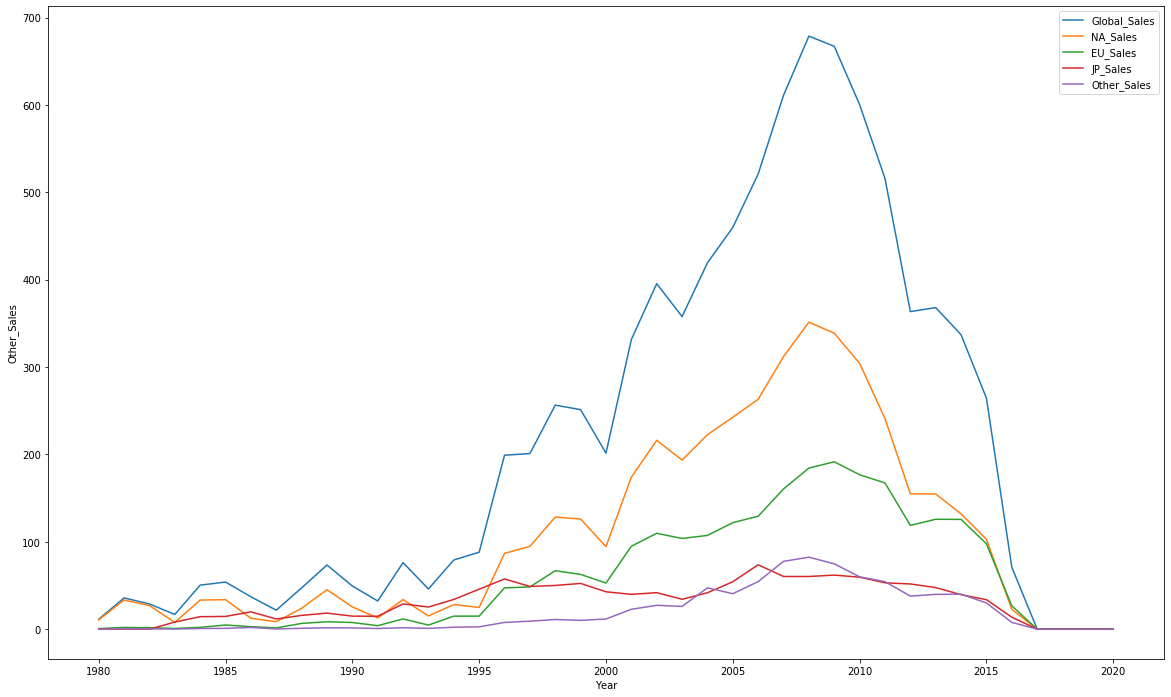

In [48]:
plt.figure(figsize=(20,12))
sns.lineplot(data=sales_global_yearly,x='Year',y='Global_Sales',label='Global_Sales')
sns.lineplot(data=sales_NA_yearly,x='Year',y='NA_Sales',label='NA_Sales')
sns.lineplot(data=sales_EU_yearly,x='Year',y='EU_Sales',label='EU_Sales')
sns.lineplot(data=sales_JP_yearly,x='Year',y='JP_Sales',label='JP_Sales')
sns.lineplot(data=sales_other_yearly,x='Year',y='Other_Sales',label='Other_Sales')

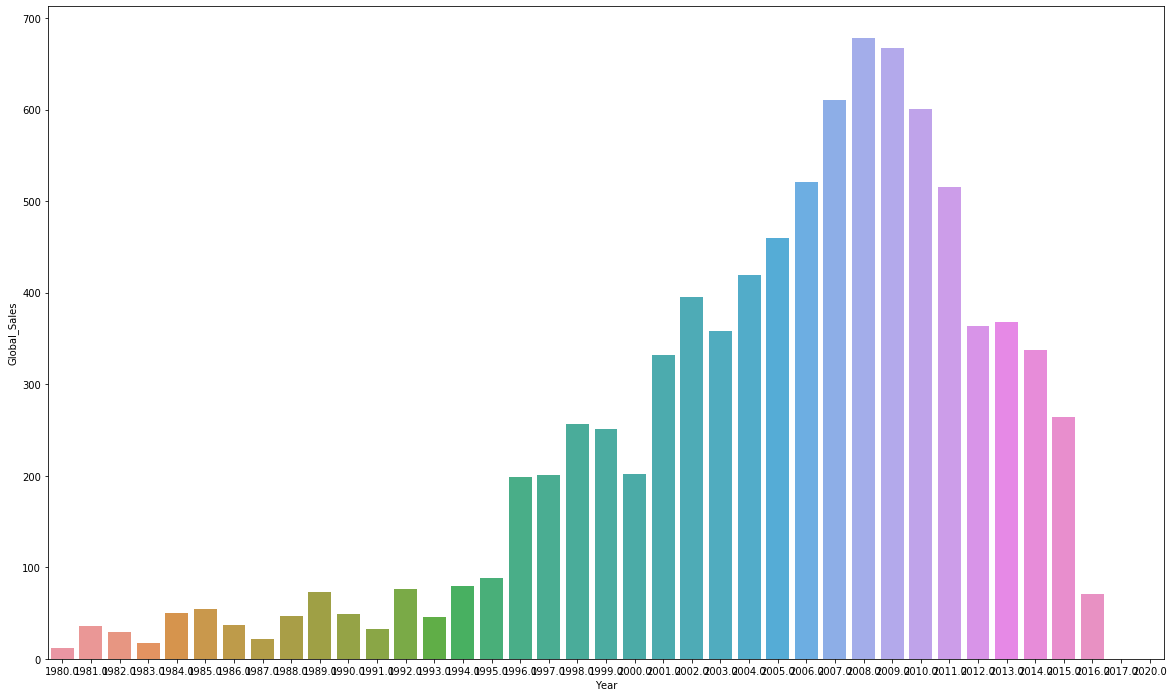

In [37]:
#по результатм анализа можно увидеть, что самые высокие продажи были в 2008 и 2009 гг.
plt.figure(figsize=(20,12))
sns.barplot(data=sales_global_yearly,x='Year',y='Global_Sales')

In [68]:
#TOP 10 самых прибыльных платформ
sales_global_platform=df.groupby(['Platform'], as_index=False). \
                        agg({'Global_Sales':'sum'}).sort_values('Global_Sales', ascending=False)

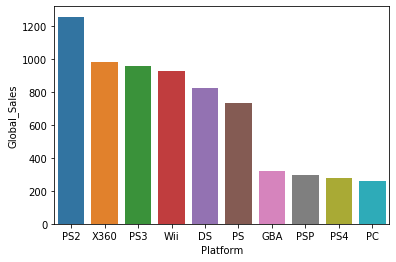

In [57]:
sns.barplot(data=sales_global_platform.head(10),x='Platform',y='Global_Sales')

In [58]:
#Наименее прибыльная платформа за всю историю наблюдений стала:
sales_global_platform.tail(1)

Platform  Global_Sales
14     PCFX          0.03

In [69]:
#Какие жанры стали наиболее прибыльными?
sales_global_genre=df.groupby(['Genre'], as_index=False) \
                    .agg({'Global_Sales':'sum'}) \
                    .sort_values('Global_Sales', ascending=False)
sales_global_genre

Genre  Global_Sales
0         Action       1751.18
10        Sports       1330.93
8        Shooter       1037.37
7   Role-Playing        927.37
4       Platform        831.37
3           Misc        809.96
6         Racing        732.04
2       Fighting        448.91
9     Simulation        392.20
5         Puzzle        244.95
1      Adventure        239.04
11      Strategy        175.12

In [ ]:
#Жанры Action, Sports и Shooter стали наиболее прибыльными за всю историю наблюдений.

In [79]:
#Теперь подробнее взглянем на самый прибыльный год. TOP5 самых прибыльных игр в этом году стали:
df.query('Year == 2008').sort_values('Global_Sales', ascending=False).head(5)

Rank                      Name Platform    Year         Genre  \
2      3            Mario Kart Wii      Wii  2008.0        Racing   
39    40   Super Smash Bros. Brawl      Wii  2008.0      Fighting   
51    52       Grand Theft Auto IV     X360  2008.0        Action   
56    57       Grand Theft Auto IV      PS3  2008.0        Action   
88    89  Pokémon Platinum Version       DS  2008.0  Role-Playing   

               Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
2               Nintendo     15.85     12.88      3.79         3.31   
39              Nintendo      6.75      2.61      2.66         1.02   
51  Take-Two Interactive      6.76      3.10      0.14         1.03   
56  Take-Two Interactive      4.76      3.76      0.44         1.62   
88              Nintendo      2.82      1.78      2.69         0.55   

    Global_Sales  
2          35.82  
39         13.04  
51         11.02  
56         10.57  
88          7.84